# AutoVisionAI Training Notebook

### UNet Training and Inference

In [ ]:
from autovisionai.models.unet.unet_trainer import UnetTrainer
from train import train_model

model = UnetTrainer()
train_model(exp_number=3, model=model, batch_size=4, max_epochs=200, epoch_patience=5, 
            use_resize=False, use_random_crop=True, use_hflip=True)

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir C:\DATA\Projects\AutoVisionAI\experiments

In [45]:
from autovisionai.utils.utils import get_input_image_for_inference
from autovisionai.models.unet.unet_inference import model_inference
from autovisionai.utils.utils import show_pic_and_pred_semantic_mask
from autovisionai.configs.config import CONFIG
import confuse
from pathlib import Path
from PIL import Image


# Provide a path to model.pt checkpoint of your trained model
experiment_number = 3
trained_model_path = Path(CONFIG["trainer"]["logs_and_weights_root"].get(confuse.Filename())) / f'exp_{experiment_number}/weights/model.pt'

# You may check your model performance with one of the image from dataset 
# or any other car image on your Google Drive
path_image = 'path/to/local/image'

# Or you also may check it with the any image in the internet
# url_to_image = 'url/to/internet/image'

# image = get_input_image_for_inference(local_path=path_to_local_image) 
# For example, let's take an image of C8:
c8_url = 'https://web-assets.net/cms-photos/2023/08/1st/107343/1.jpg'
image = get_input_image_for_inference(url=c8_url) 
# photo_path = r'C:\DATA\Projects\AutoVisionAI\data\images\0cdf5b5d0ce1_03.jpg'
# image = get_input_image_for_inference(local_path=photo_path)

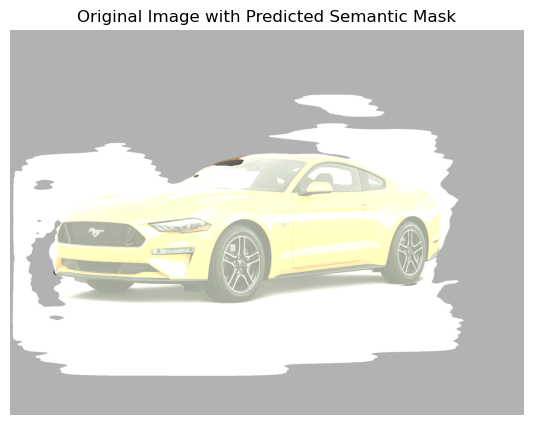

In [46]:
mask = model_inference(trained_model_path, image)

# Visualizing results
show_pic_and_pred_semantic_mask(image, mask, use_plt=True)

### FastSCNN Training and Inference

In [ ]:
from autovisionai.models.fast_scnn.fast_scnn_trainer import FastSCNNTrainer
from train import train_model

model = FastSCNNTrainer()
train_model(exp_number=3, model=model, batch_size=4, max_epochs=200, epoch_patience=5, 
            use_resize=False, use_random_crop=True, use_hflip=True)